# Here are simple way to practice "**Image Processing**" with easy steps using OpenCV and Python.


### Let's define a function to get an image from google

In [86]:
import requests

def download_image(url, save_path):
    response = requests.get(url)
    response.raise_for_status()
    
    with open(save_path, 'wb') as file:
        file.write(response.content)
    
    print("Image downloaded successfully!")

# Example usage
image_url = "https://i.pinimg.com/736x/78/ed/cd/78edcd2cf88aaef199dca4a269e4a507.jpg"  # Replace with the actual image URL
save_path = "downloaded_image.jpg"  # Specify the path where you want to save the image

download_image(image_url, save_path)

Image downloaded successfully!


### Load and convert the image

In [87]:
import cv2

img = cv2.imread(save_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
assert img.shape != None

## Let's see what the image looks like.
## Remarks :
### - Noisy ;
### - Lack of contrast ;
### - ...

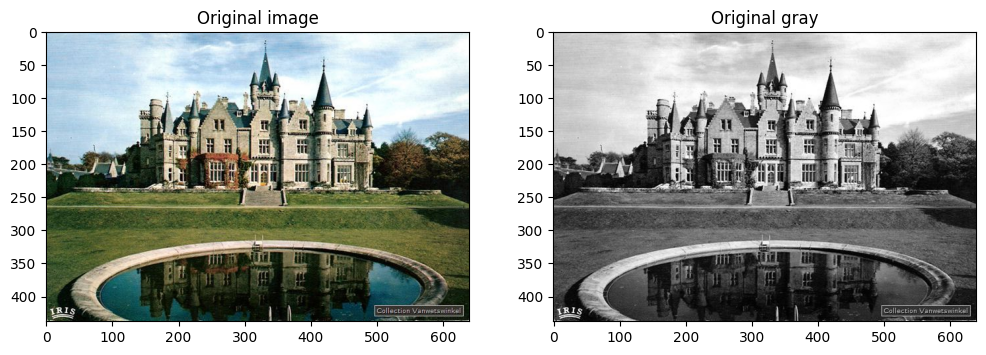

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Original gray')
plt.show()

 ### Noise reduction
 #### Applying a Gaussian blur will decrease the noise in the pic

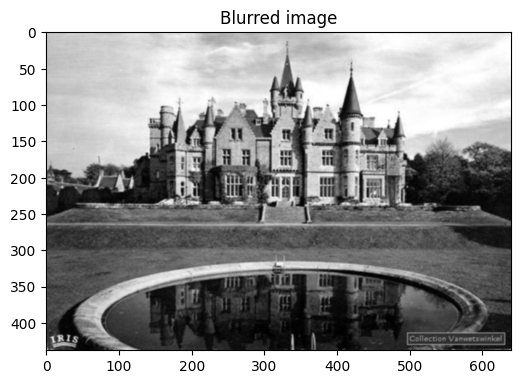

In [89]:
# Chose the kernel size to apply to the pic
kernel = (3, 3)

# Apply Gaussian blur for noise reduction
blurred = cv2.GaussianBlur(gray, kernel, 0)

plt.figure(figsize=(6, 6))
plt.imshow(blurred, cmap='gray')
plt.title('Blurred image')
plt.show()

### Sharpen the image
#### Apply a sharpening function to enhance the quality

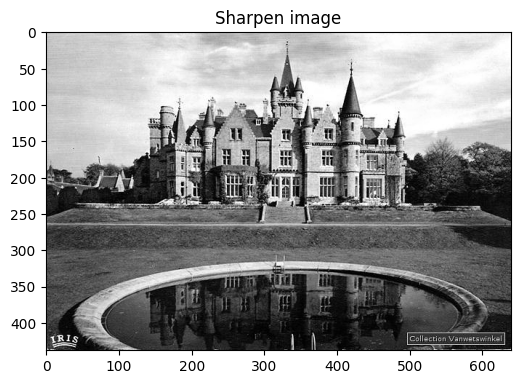

In [90]:
# Enhance image sharpness using unsharp masking
unsharp = cv2.addWeighted(gray, 1.5, blurred, -0.5, 0)

plt.figure(figsize=(6, 6))
plt.imshow(unsharp, cmap='gray')
plt.title('Sharpen image')
plt.show()

### Equalize the image to increase contrast

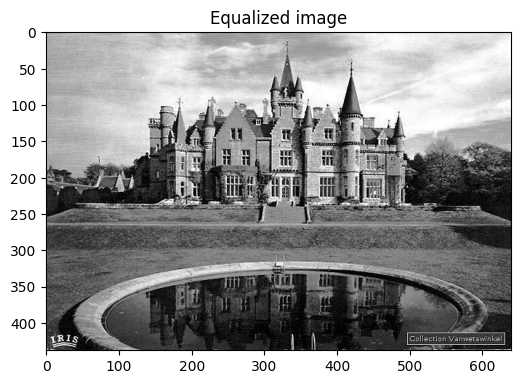

In [91]:
# Increase contrast using histogram equalization
equalized = cv2.equalizeHist(unsharp)

plt.figure(figsize=(6, 6))
plt.imshow(equalized, cmap='gray')
plt.title('Equalized image')
plt.show()

### Let's see what are the edges present on the image

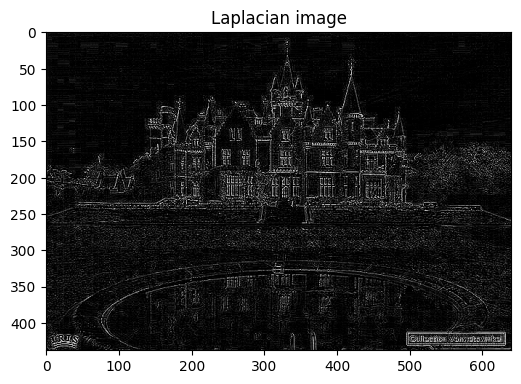

In [92]:
# Sharpen edges using the Laplacian filter
laplacian = cv2.Laplacian(equalized, cv2.CV_8U)

plt.figure(figsize=(6, 6))
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian image')
plt.show()

### And now let's denoise the gradient image


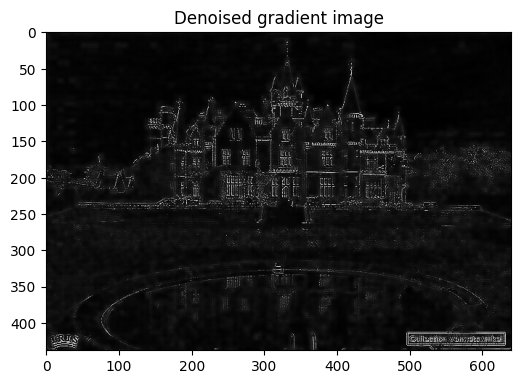

In [93]:
# Apply bilateral filtering for noise reduction while preserving edges
denoised = cv2.bilateralFilter(laplacian, 9, 75, 75)

plt.figure(figsize=(6, 6))
plt.imshow(denoised, cmap='gray')
plt.title('Denoised gradient image')
plt.show()

## Previous result is now satisfying
### Let us use different methods

In [94]:
r, g, b = cv2.split(img)

# Apply image enhancement operations to each color channel

# Apply Gaussian blur for noise reduction
blurred_b = cv2.GaussianBlur(b, (3, 3), 0)
blurred_g = cv2.GaussianBlur(g, (3, 3), 0)
blurred_r = cv2.GaussianBlur(r, (3, 3), 0)

# Enhance image sharpness using unsharp masking
unsharp_b = cv2.addWeighted(b, 1.5, blurred_b, -0.5, 0)
unsharp_g = cv2.addWeighted(g, 1.5, blurred_g, -0.5, 0)
unsharp_r = cv2.addWeighted(r, 1.5, blurred_r, -0.5, 0)

# Merge the enhanced color channels back into a single image
enhanced_image = cv2.merge([unsharp_r, unsharp_g, unsharp_b])

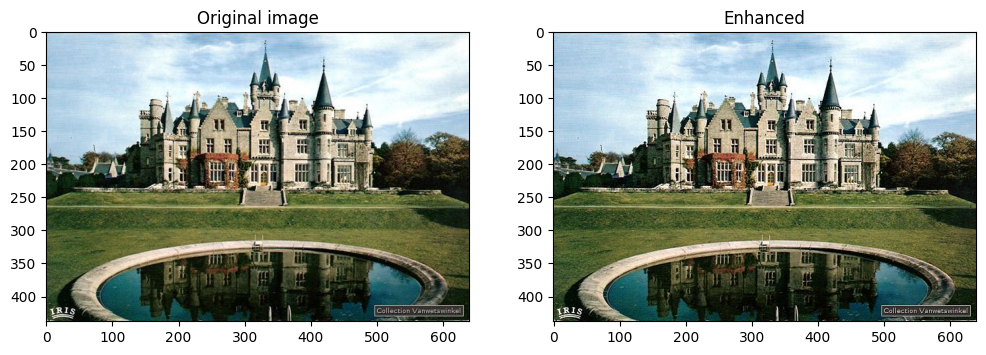

In [95]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title('Enhanced')
plt.show()

### Results are slightly better now

### CLAHE is used now to enhance the contrast, it depends of the clipLimits and GridSize params

In [96]:
# Convert the image to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

# Split the LAB image into L, A, and B channels
l, a, b = cv2.split(lab)

# Apply CLAHE to the L channel for contrast enhancement
clahe_2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
enhanced_l_2 = clahe_2.apply(l)

clahe_5 = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(4, 4))
enhanced_l_5 = clahe_5.apply(l)

# Merge the enhanced L channel with the original A and B channels
enhanced_lab_2 = cv2.merge([enhanced_l_2, a, b])
enhanced_lab_5 = cv2.merge([enhanced_l_5, a, b])

# Convert the enhanced LAB image back to the BGR color space
enhanced_image_2 = cv2.cvtColor(enhanced_lab_2, cv2.COLOR_LAB2RGB)
enhanced_image_5 = cv2.cvtColor(enhanced_lab_5, cv2.COLOR_LAB2RGB)

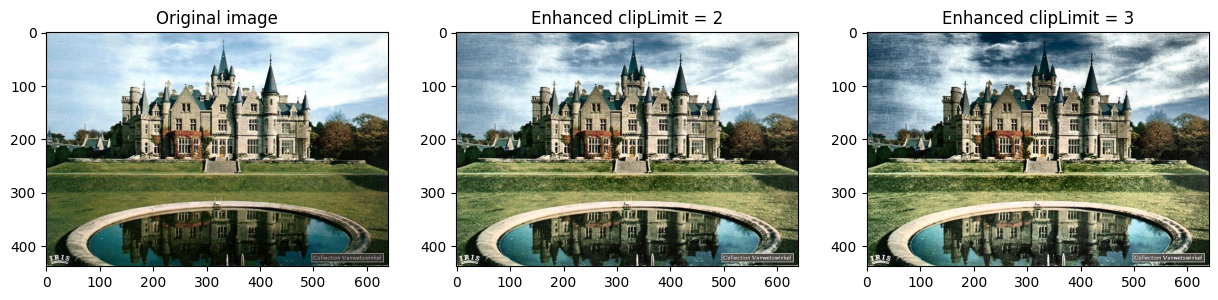

In [97]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.imshow(enhanced_image_2)
plt.title('Enhanced clipLimit = 2')
plt.subplot(1, 3, 3)
plt.imshow(enhanced_image_5)
plt.title('Enhanced clipLimit = 3')
plt.show()

### Here the contrast are well changed, however the image properties are changing a lot

### Let's use a smoother method

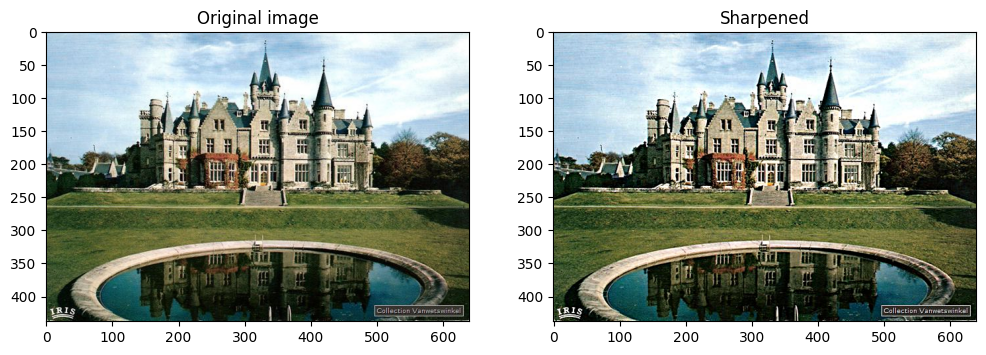

In [98]:
import numpy as np

# Convert the image to float32 for better precision
image = img.astype(np.float32) / 255.0

# Apply Gaussian blur to create the "blurred" version of the image
blurred = cv2.GaussianBlur(image, (0, 0), 3)

# Calculate the difference between the original and blurred images
difference = image - blurred

# Define a scaling factor to control the strength of the sharpening effect
scaling_factor = 0.5

# Add the scaled difference back to the original image
sharpened = image + scaling_factor * difference

# Clip the pixel values to the valid range [0, 1]
sharpened = np.clip(sharpened, 0, 1)

# Convert the image back to uint8 format
sharpened = (sharpened * 255).astype(np.uint8)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(sharpened)
plt.title('Sharpened')
plt.show()

### Here the sharpening process makes the contrast better. However the image quality remains to be enhanced. Maybe using ML methods.